In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
import xarray as xr
import pandas as pd
from xgcm import Grid
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from dask.diagnostics import ProgressBar
import os
from datetime import timedelta
import copy

In [8]:
import bsose.preprocess as pp

In [9]:
ds,xgrid = pp.load_bsose()

In [68]:
N = 50
lats1D = np.linspace(-61.5,-55.5,N)
lons1D=291*np.ones(N)
depths1D=-1*np.linspace(1000,3000,N)
[lons,lats,depths] = np.meshgrid(lons1D,lats1D,depths1D)

In [88]:
iselect = {"time":-1}
selectslice = {"YC":slice(-65,-50)}
select = {"XC":300}
da = ds["THETA"].isel(
    **iselect).sel(
    **select,method='nearest').sel(
    **selectslice)
da_masked = np.ma.masked_where(da==0,da)

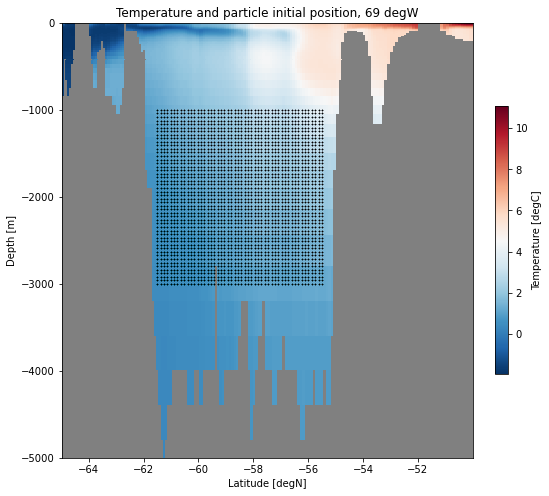

In [110]:
fig,ax = plt.subplots(figsize=(8,8))
cmap = copy.copy(cm.RdBu_r)
cmap.set_bad('lightgray')
im = ax.pcolormesh(da['YC'],da['Z'],da_masked,shading='auto',cmap='RdBu_r')
ax.plot(lats.flatten(),
        depths.flatten(),
        linestyle='None',
        marker='.',
        color='k',
        markersize=0.1)
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Latitude [degN]')
ax.set_title('Temperature and particle initial position, 69 degW')
ax.set_ylim([-5000,0])
plt.colorbar(im,ax=ax,
             fraction=0.03,pad=0.05,
             label='Temperature [degC]')